# FILM STAR IMAGE CLASSIFICATIN

In [293]:
!pip install seaborn==0.8.1

In [294]:
!pip install PyWavelets

In [295]:
!pip install opencv-python 

In [ ]:
#IMPORTING LIBRARIES

In [296]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [ ]:
#IMPORTING A TEST IMAGE

In [297]:
img=cv2.imread('C:/project/model/test_images/mamooty.jpg')
img.shape

(631, 627, 3)

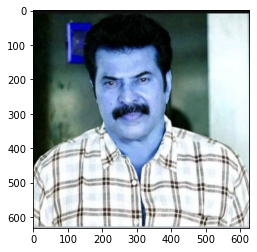

In [298]:
plt.imshow(img)

In [ ]:
#CONVERTING TO GRAY

In [299]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(631, 627)

In [300]:
gray


array([[ 15,  15,  15, ...,  15,  15,  15],
       [ 15,  15,  15, ...,  15,  15,  15],
       [ 15,  15,  15, ...,  15,  15,  15],
       ...,
       [186, 186, 185, ..., 186, 185, 185],
       [184, 185, 186, ..., 188, 188, 188],
       [184, 185, 185, ..., 187, 188, 188]], dtype=uint8)

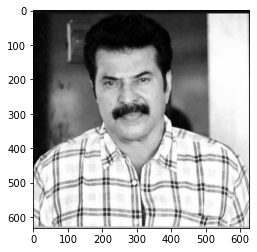

In [301]:
plt.imshow(gray,cmap='gray')

In [302]:
face_cascade = cv2.CascadeClassifier('C:/project/model/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/project/model/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[141, 103, 268, 268]])

In [303]:
(x,y,w,h)=faces[0]


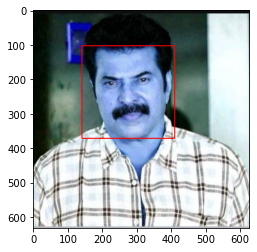

In [304]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

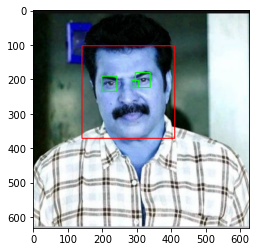

In [305]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

In [ ]:
#Preprocessing: Crop the facial region of the image

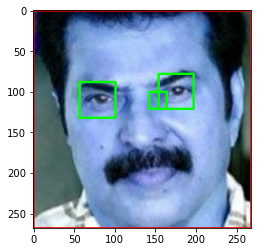

In [306]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

In [307]:
cropped_img = np.array(roi_color)
cropped_img.shape

(268, 268, 3)

In [ ]:
#Preprocessing: Use wavelet transform as a feature for traning our model

In [308]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

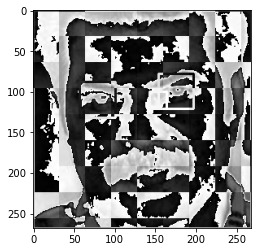

In [309]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [310]:
        
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(gray, 1.3, 5)
      for (x,y,w,h) in faces:
          roi_gray = gray[y:y+h, x:x+w]
          roi_color = img[y:y+h, x:x+w]
          eyes = eye_cascade.detectMultiScale(roi_gray)
          if len(eyes) >= 2:
            return roi_color        

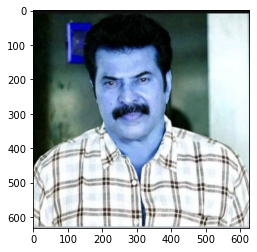

In [311]:
orginal_image=cv2.imread('C:/project/model/test_images/mamooty.jpg')
plt.imshow(orginal_image)

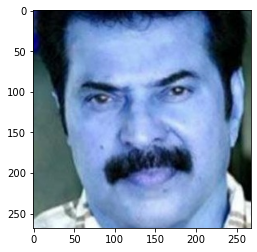

In [312]:
cropped_image=get_cropped_image_if_2_eyes('C:/project/model/test_images/mamooty.jpg')
plt.imshow(cropped_image)

In [ ]:
# Path of Folders to retrive and save cropped data set

In [313]:
path_to_data="C:/project/model/dataset/"
path_cr_data="C:/project/model/dataset/cropped"

In [314]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
        img_dirs.append(entry.path)


In [315]:
img_dirs

['C:/project/model/dataset/cropped',
 'C:/project/model/dataset/dulquer salmaan',
 'C:/project/model/dataset/jayaram',
 'C:/project/model/dataset/Jmohanlal',
 'C:/project/model/dataset/mammootty']

In [ ]:
#Creating folders to save cropped images

In [316]:
import shutil
if os.path.exists(path_cr_data):
    shutil.rmtree(path_cr_data)
os.mkdir(path_cr_data)

In [317]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
dulquer salmaan
Generating cropped images in folder:  C:/project/model/dataset/croppeddulquer salmaan
jayaram
Generating cropped images in folder:  C:/project/model/dataset/croppedjayaram
Jmohanlal
Generating cropped images in folder:  C:/project/model/dataset/croppedJmohanlal
mammootty
Generating cropped images in folder:  C:/project/model/dataset/croppedmammootty


In [ ]:
# Creating Customized file name

In [319]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'croppeddulquer salmaan': ['C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan1.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan10.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan11.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan13.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan15.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan16.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan2.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan3.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan4.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan5.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan6.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan7.png',
  'C:/project/model/dataset/croppeddulquer salmaan\\dulquer salmaan8.

In [ ]:
#assigning numerical valuses to each actors

In [320]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'croppeddulquer salmaan': 0,
 'croppedjayaram': 1,
 'croppedJmohanlal': 2,
 'croppedmammootty': 3}

In [ ]:
# Scaling and keeping raw cropped image and wavelet transformed images together

In [323]:
x=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
         img = cv2.imread(training_image)
         scalled_raw_img = cv2.resize(img, (32, 32))
         img_har = w2d(cropped_img,'db1',5)
         scalled_img_har = cv2.resize(img_har, (32, 32))
         combined_img=  np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
         x.append(combined_img)
         y.append(class_dict[celebrity_name])

In [324]:
len(x)

53

In [326]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(53, 4096)

In [ ]:
#STARTING TRAINING OF THE MODEL

In [355]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [350]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([("scaler",StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.42857142857142855

In [353]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.25      1.00      0.40         1
           2       1.00      0.20      0.33         5
           3       0.38      0.75      0.50         4

    accuracy                           0.43        14
   macro avg       0.66      0.55      0.41        14
weighted avg       0.77      0.43      0.40        14



In [ ]:
#GRID SEARCH TO IDENTIFY THE BEST DIFFERENT MODELS

In [356]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [357]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [359]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.610714,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.557143,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.607143,{'logisticregression__C': 1}


In [363]:
best_estimators['svm'].score(x_test,y_test)

0.42857142857142855

In [364]:
best_estimators['random_forest'].score(x_test,y_test)

0.35714285714285715

In [365]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.5714285714285714

In [367]:
best_clf = best_estimators['logistic_regression']

In [369]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[3, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 2, 3, 0],
       [1, 1, 0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

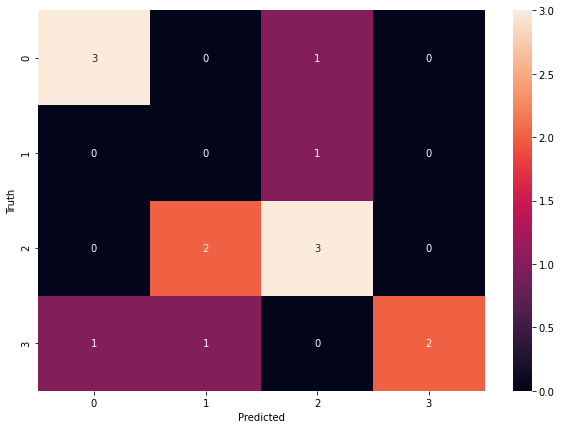

In [370]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [371]:
class_dict

{'croppeddulquer salmaan': 0,
 'croppedjayaram': 1,
 'croppedJmohanlal': 2,
 'croppedmammootty': 3}

In [ ]:
#SAVE THE TRAINED MODEL

In [376]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'C:/project/model/dataset/saved_model.pkl') 

['C:/project/model/dataset/saved_model.pkl']

In [ ]:
#SAVE CLASS DICTIONARY

In [377]:
import json
with open("C:/project/model/dataset/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))